In [1]:
%cd -q ..
%load_ext autoreload
%autoreload 2

/home/ismael/miniconda3/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt
import plotnine as pn

from utils.common import fct_lump_n, remove_unicode
from utils.formatter import pl_M

### Set up


In [3]:
pn.theme_set(pn.theme_light)

### Helpers


### Comments

- In the original version of the dataset there where duplicate movies, wrong mpaa_rating. The current dataset has only one duplite movie (Tau ming chong)


---


In [15]:
path = "data/568_movie_profit.csv"
df = pd.read_csv(path)
df["release_date"] = pd.to_datetime(df["release_date"])
df["distributor"] = df["distributor"].str.replace("\xa0", " ", regex=False)
df["distributor_lumped"] = fct_lump_n(df, "distributor", 5)
df = df.drop_duplicates()
df.shape

(3400, 9)

In [16]:
print(df.columns.tolist())

['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'distributor', 'mpaa_rating', 'genre', 'distributor_lumped']


/home/ismael/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 31'. Pick better value with 'binwidth'.


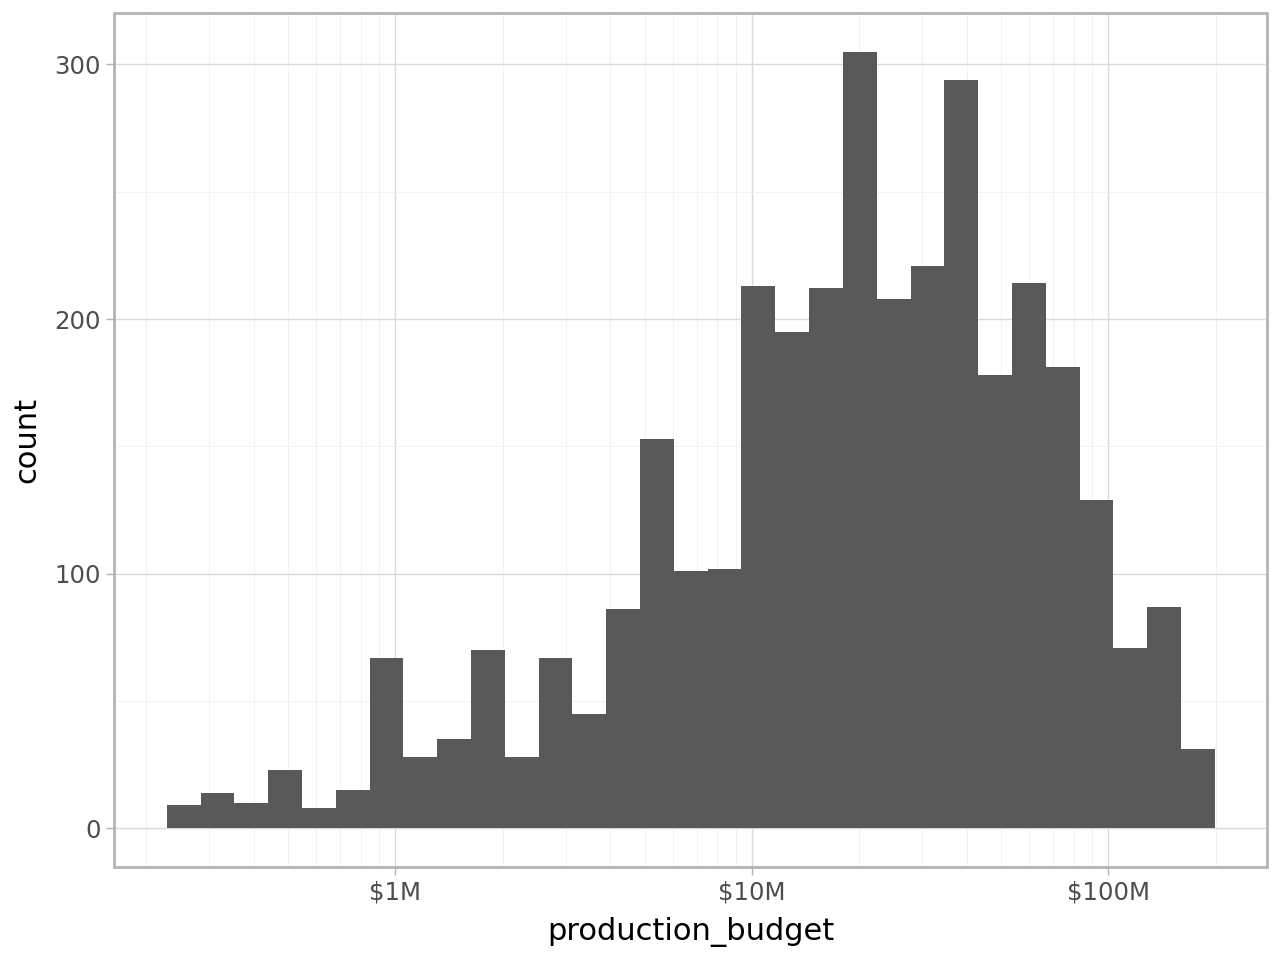

In [17]:
(
    pn.ggplot(df, pn.aes(x="production_budget"))
    + pn.geom_histogram()
    + pn.scale_x_log10(labels=pl_M)
)

Considerations:

- Almost every time you see money, you wanna put it in a log scale. Since they use to be log normal distributed.

Interpretation:

- Production budget kind of log normal distributed.
- It's probably not very lognormal because it has a factor influencing this: ditributer maybe

Questions:

- How to interpret/communicate a log scale histogram or any other plot in that scale?


In [18]:
df.describe(include=["O"])

,movie,distributor,mpaa_rating,genre,distributor_lumped
count,3400,3353,3263,3400,3400
unique,3400,201,4,5,6
top,Evan Almighty,Warner Bros.,R,Drama,Other
freq,1,374,1513,1236,1831


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3400 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        3400 non-null   datetime64[ns]
 1   movie               3400 non-null   object        
 2   production_budget   3400 non-null   float64       
 3   domestic_gross      3400 non-null   float64       
 4   worldwide_gross     3400 non-null   float64       
 5   distributor         3353 non-null   object        
 6   mpaa_rating         3263 non-null   object        
 7   genre               3400 non-null   object        
 8   distributor_lumped  3400 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 265.6+ KB


### How many


In [24]:
df.groupby("distributor_lumped")["movie"].nunique().sort_values(ascending=False)

distributor_lumped
Other                 1831
Warner Bros.           374
Sony Pictures          339
Universal              307
20th Century Fox       282
Paramount Pictures     267
Name: movie, dtype: int64